# Analysis of itemized individual contributions: Kamala Harris

This is a rough notebook we used to analyzed itemized individual contributions filed by campaigns to the [Federal Election Commission (FEC)](https://www.fec.gov/data/). Campaigns are required to make monthly and quarterly filings (this notebook works for *monthly* filings). 

The notebook below is for **Kamala Harris for President** campaign. An almost identical notebook is present in the notebook for Republican rival, Donald Trump.

## Import packages

In [1]:
import pandas as pd
from plotnine import *
# import MySQLdb
import fecfile
import requests
import time
# import sqlalchemy
#import pickle
import datetime
import numpy as np

## Data dictionary

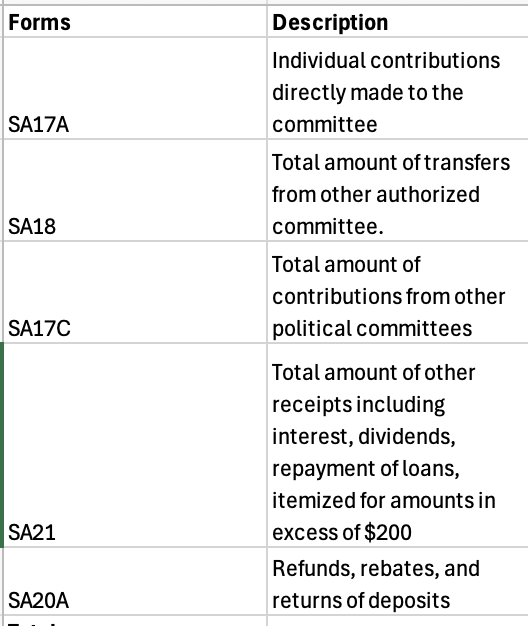

## Get file number for F3PN for each campaign

F3PN is for contributions and expenses. Below, you need to input the **file number** in the code to work. You can find that in the filings section of each campaign on the FEC website.

- Kamala Harris for President
- Donald J. Trump for President 2024, Inc.

In [2]:
filing = fecfile.from_http('1812381') #file no for Kamala
# filing

## Schedule A: Contributions

Schedule B is for expenses

In [3]:
df = pd.DataFrame(filing['itemizations']['Schedule A'])
df.contribution_date=pd.to_datetime(df.contribution_date)
df.contribution_amount=pd.to_numeric(df.contribution_amount)
df[df.memo_code=='X'].to_clipboard(index=False)
# pd.set_option('display.max_columns', None)
df

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,7012053,7012053E,SA17A,IND,,Blakemore,James,J.,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,7012053E,,,PAC,ActBlue,,,,...,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,14355332,,,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
3,SA17A,C00703975,14355343,14355332,SA17A,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
4,SA17A,C00703975,8948365,8948365E,SA17A,IND,,Cogswell,Ron,,...,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251452,SA20A,C00703975,17523148,,,ORG,Gusto,,,,...,,,,,,,,,Payroll Tax Refund,
1251453,SA20A,C00703975,17523123,,,ORG,Wisconsin Center District,,,,...,,,,,,,,,Site Rental Refund,
1251454,SA21,C00703975,16116859,,,ORG,Amalgamated Bank,,,,...,,,,,,,,,Interest earned,
1251455,SA21,C00703975,16116860,,,ORG,Amalgamated Bank,,,,...,,,,,,,,,Interest earned,


In [4]:
df.form_type.value_counts()

SA17A    889178
SA18     362260
SA17C        10
SA20A         6
SA21          3
Name: form_type, dtype: int64

In [17]:
df.entity_type.value_counts()

IND    809221
PAC    442215
ORG        10
CCM         6
COM         4
PTY         1
Name: entity_type, dtype: int64

# SA17A: direct contributions

In [5]:
sa17a= df[df.form_type=='SA17A']
sa17a

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,7012053,7012053E,SA17A,IND,,Blakemore,James,J.,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,7012053E,,,PAC,ActBlue,,,,...,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,14355332,,,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
3,SA17A,C00703975,14355343,14355332,SA17A,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
4,SA17A,C00703975,8948365,8948365E,SA17A,IND,,Cogswell,Ron,,...,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889173,SA17A,C00703975,13768398E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
889174,SA17A,C00703975,13702629,13702629E,SA17A,IND,,Zylstra,Sonia,,...,,,,,,,,,* Earmarked Contribution: See Below,
889175,SA17A,C00703975,13702629E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
889176,SA17A,C00703975,13837413,13837413E,SA17A,IND,,Zylstra,Tamara,,...,,,,,,,,,* Earmarked Contribution: See Below,


### SA17A: remove the memo code

Check the FEC for more information on this. But basically, this is to prevent double counting and duplicates.

In [6]:
sa17a_memo = sa17a[sa17a.memo_code!='X']
sa17a_memo

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
40,SA17A,C00703975,9669435,9669435E,SA17A,IND,,Bloom,Judith,Gold,...,,,,,,,,,* Earmarked Contribution: See Below,
42,SA17A,C00703975,9669421,9669421E,SA17A,IND,,Channing,Alan,,...,,,,,,,,,* Earmarked Contribution: See Below,
44,SA17A,C00703975,9669436,9669436E,SA17A,IND,,Glant,Lauren,,...,,,,,,,,,* Earmarked Contribution: See Below,
46,SA17A,C00703975,9669434,9669434E,SA17A,IND,,Goldman,Joe,,...,,,,,,,,,* Earmarked Contribution: See Below,
48,SA17A,C00703975,9669433,9669433E,SA17A,IND,,Kuriansky,Joan,,...,,,,,,,,,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889168,SA17A,C00703975,13744430,13744430E,SA17A,IND,,Zwicker,Jennifer,,...,,,,,,,,,* Earmarked Contribution: See Below,
889170,SA17A,C00703975,13608427,13608427E,SA17A,IND,,Zychinski,David,,...,,,,,,,,,* Earmarked Contribution: See Below,
889172,SA17A,C00703975,13768398,13768398E,SA17A,IND,,Zyda,Alysa,,...,,,,,,,,,* Earmarked Contribution: See Below,
889174,SA17A,C00703975,13702629,13702629E,SA17A,IND,,Zylstra,Sonia,,...,,,,,,,,,* Earmarked Contribution: See Below,


In [7]:
sa17a_memo.contribution_amount.sum()

71320443.02

In [18]:
sa17a_memo.entity_type.value_counts()

IND    442604
Name: entity_type, dtype: int64

In [12]:
# sa17a_memo.to_clipboard(index=False)

## Check: Just the memo codes

Again, some checking you may want to do. Just check on how much all those memo codes amount to.

In [8]:
memo_x= sa17a[sa17a.memo_code=='X']
memo_x

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,7012053,7012053E,SA17A,IND,,Blakemore,James,J.,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,7012053E,,,PAC,ActBlue,,,,...,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,14355332,,,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
3,SA17A,C00703975,14355343,14355332,SA17A,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
4,SA17A,C00703975,8948365,8948365E,SA17A,IND,,Cogswell,Ron,,...,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889169,SA17A,C00703975,13744430E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
889171,SA17A,C00703975,13608427E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
889173,SA17A,C00703975,13768398E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
889175,SA17A,C00703975,13702629E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,


In [9]:
memo_x.contribution_amount.sum()

71063137.02

## Filter all individual contributions in SA17A

You MAY only need to do this if removing the memo code doesn't do the trick. Remember to double check your data with the summary of contributions of each campaign on the FEC website.

In [13]:
sa17a_IND = sa17a[sa17a.entity_type=='IND'].reset_index(drop=True)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,7012053,7012053E,SA17A,IND,,Blakemore,James,J.,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,14355332,,,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
2,SA17A,C00703975,14355343,14355332,SA17A,IND,,Blakemore,James J.,J.,...,,,,,,,,X,,
3,SA17A,C00703975,8948365,8948365E,SA17A,IND,,Cogswell,Ron,,...,,,,,,,,X,* Earmarked Contribution: See Below,
4,SA17A,C00703975,13586957,,,IND,,Cogswell,Ron,,...,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446971,SA17A,C00703975,13744430,13744430E,SA17A,IND,,Zwicker,Jennifer,,...,,,,,,,,,* Earmarked Contribution: See Below,
446972,SA17A,C00703975,13608427,13608427E,SA17A,IND,,Zychinski,David,,...,,,,,,,,,* Earmarked Contribution: See Below,
446973,SA17A,C00703975,13768398,13768398E,SA17A,IND,,Zyda,Alysa,,...,,,,,,,,,* Earmarked Contribution: See Below,
446974,SA17A,C00703975,13702629,13702629E,SA17A,IND,,Zylstra,Sonia,,...,,,,,,,,,* Earmarked Contribution: See Below,


In [14]:
sa17a_IND.contribution_amount.sum()

71321259.02000001

In [19]:
sa17a_IND.entity_type.value_counts()

IND    446976
Name: entity_type, dtype: int64

In [15]:
# sa17a_IND.to_clipboard(index=False) for checking

## Put the contributions into buckets

If you want to analyze how big were the individual contributions. These categorizes them up to $200 or more.

In [20]:
def categorize_amount(amount):
    if 1 <= amount <= 24:
        return '1-24'
    if 25 <= amount <= 49:
        return '25-49'
    elif 50 <= amount <= 74:
        return '50-74'
    elif 75 <= amount <= 99:
        return '75-99'
    elif 100 <= amount <= 149:
        return '100-149'
    elif 150 <= amount <= 199:
        return '150-199'
    elif amount >= 200:
        return '200 and over'
    else:
        return 'Below 1'

In [21]:
sa17a_memo['range'] = sa17a_memo['contribution_amount'].apply(categorize_amount)
sa17a_memo

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_1243/1722508842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
40,SA17A,C00703975,9669435,9669435E,SA17A,IND,,Bloom,Judith,Gold,...,,,,,,,,* Earmarked Contribution: See Below,,100-149
42,SA17A,C00703975,9669421,9669421E,SA17A,IND,,Channing,Alan,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
44,SA17A,C00703975,9669436,9669436E,SA17A,IND,,Glant,Lauren,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
46,SA17A,C00703975,9669434,9669434E,SA17A,IND,,Goldman,Joe,,...,,,,,,,,* Earmarked Contribution: See Below,,1-24
48,SA17A,C00703975,9669433,9669433E,SA17A,IND,,Kuriansky,Joan,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889168,SA17A,C00703975,13744430,13744430E,SA17A,IND,,Zwicker,Jennifer,,...,,,,,,,,* Earmarked Contribution: See Below,,100-149
889170,SA17A,C00703975,13608427,13608427E,SA17A,IND,,Zychinski,David,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
889172,SA17A,C00703975,13768398,13768398E,SA17A,IND,,Zyda,Alysa,,...,,,,,,,,* Earmarked Contribution: See Below,,25-49
889174,SA17A,C00703975,13702629,13702629E,SA17A,IND,,Zylstra,Sonia,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over


In [25]:
sa17a_memo= sa17a_memo.reset_index(drop=True)
sa17a_memo

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00703975,9669435,9669435E,SA17A,IND,,Bloom,Judith,Gold,...,,,,,,,,* Earmarked Contribution: See Below,,100-149
1,SA17A,C00703975,9669421,9669421E,SA17A,IND,,Channing,Alan,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
2,SA17A,C00703975,9669436,9669436E,SA17A,IND,,Glant,Lauren,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
3,SA17A,C00703975,9669434,9669434E,SA17A,IND,,Goldman,Joe,,...,,,,,,,,* Earmarked Contribution: See Below,,1-24
4,SA17A,C00703975,9669433,9669433E,SA17A,IND,,Kuriansky,Joan,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442599,SA17A,C00703975,13744430,13744430E,SA17A,IND,,Zwicker,Jennifer,,...,,,,,,,,* Earmarked Contribution: See Below,,100-149
442600,SA17A,C00703975,13608427,13608427E,SA17A,IND,,Zychinski,David,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over
442601,SA17A,C00703975,13768398,13768398E,SA17A,IND,,Zyda,Alysa,,...,,,,,,,,* Earmarked Contribution: See Below,,25-49
442602,SA17A,C00703975,13702629,13702629E,SA17A,IND,,Zylstra,Sonia,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over


In [22]:
categories= sa17a_memo.groupby('range').contribution_amount.sum()
categories

range
1-24              867604.57
100-149         10033748.15
150-199           883121.12
200 and over    53846083.78
25-49            2941122.69
50-74            2463747.81
75-99             284432.92
Below 1              581.98
Name: contribution_amount, dtype: float64

## Group the categories by date

This is kinda useless, tbh.

In [26]:
categories_by_date = sa17a_memo.groupby('range').resample('D', on='contribution_date').contribution_amount.sum().to_frame()
categories_by_date

contribution_amount
range   contribution_date                             
1-24    2024-07-01 00:00:00-04:00             17217.05
        2024-07-02 00:00:00-04:00             15462.72
        2024-07-03 00:00:00-04:00             21363.53
        2024-07-04 00:00:00-04:00             16226.09
        2024-07-05 00:00:00-04:00             22761.48
...                                                ...
Below 1 2024-07-27 00:00:00-04:00                24.24
        2024-07-28 00:00:00-04:00                 0.00
        2024-07-29 00:00:00-04:00                49.00
        2024-07-30 00:00:00-04:00                24.77
        2024-07-31 00:00:00-04:00               148.73

[254 rows x 1 columns]

## Simple chart of contributions under SA17A

You wanna chart the total amount of individual contributions daily per month. The data below is for all days of July 2024.

In [32]:
sa17a_IND_chart = sa17a_memo.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa17a_IND_chart

,contribution_date,contribution_amount
0,2024-06-27 00:00:00-04:00,250.00
1,2024-06-28 00:00:00-04:00,3100.00
2,2024-06-29 00:00:00-04:00,500.00
3,2024-06-30 00:00:00-04:00,350.00
4,2024-07-01 00:00:00-04:00,996317.79
5,2024-07-02 00:00:00-04:00,858405.93
6,2024-07-03 00:00:00-04:00,702878.91
7,2024-07-04 00:00:00-04:00,562558.51
8,2024-07-05 00:00:00-04:00,581180.17
9,2024-07-06 00:00:00-04:00,573801.28


In [33]:
sa17a_IND_chart = sa17a_IND_chart.sort_values('contribution_date')
sa17a_IND_chart = sa17a_IND_chart[sa17a_IND_chart.contribution_date>='2024-07-01'].reset_index(drop=True) #only June
sa17a_IND_chart

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,996317.79
1,2024-07-02 00:00:00-04:00,858405.93
2,2024-07-03 00:00:00-04:00,702878.91
3,2024-07-04 00:00:00-04:00,562558.51
4,2024-07-05 00:00:00-04:00,581180.17
5,2024-07-06 00:00:00-04:00,573801.28
6,2024-07-07 00:00:00-04:00,357653.53
7,2024-07-08 00:00:00-04:00,473287.85
8,2024-07-09 00:00:00-04:00,445534.59
9,2024-07-10 00:00:00-04:00,395660.37


In [ ]:
# sa17a_IND_chart.to_csv('direct_cumulative.csv', index=False) #save the previous table into CSV

<AxesSubplot:title={'center':'Individual direct contributions to Harris campaign'}, xlabel='contribution_date'>

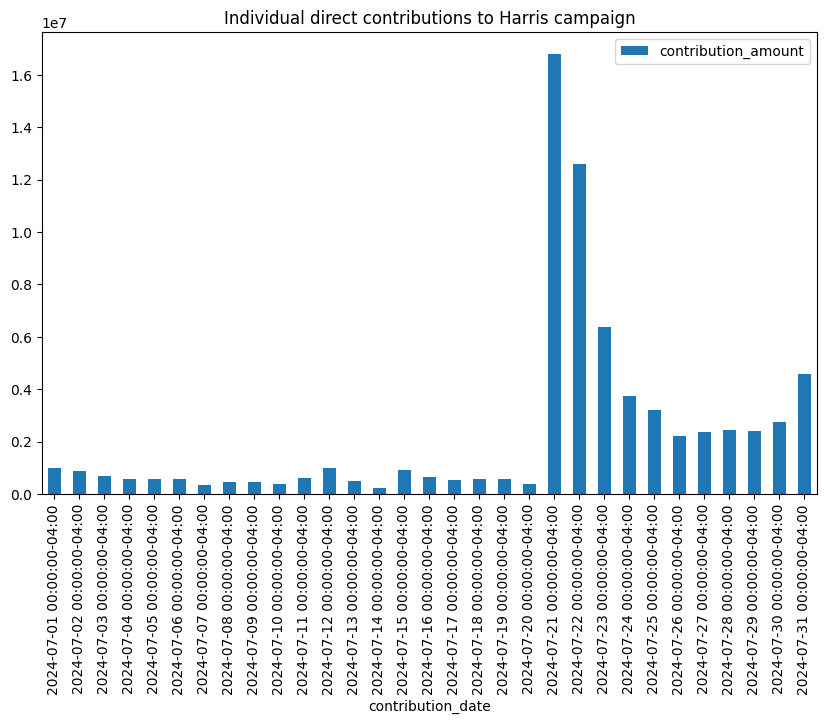

In [35]:
sa17a_IND_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title='Individual direct contributions to Harris campaign')

# SA18: transfers from authorized finance committee

These are individual contributions funneled to the authorized finance committees of each campaign. Essentially like how contributons to ActBlue or WinRed get funneled to Democratic and Republican campaigns, respectively.

In [36]:
sa18= df[df.form_type=='SA18']
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
889188,SA18,C00703975,11932744,,,COM,Harris Victory Fund,,,,...,,,,,,,,,,
889189,SA18,C00703975,17953346,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,,X,* Harris Victory Fund,
889190,SA18,C00703975,17953347,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,,X,* Harris Victory Fund,
889191,SA18,C00703975,16290350,11932744,SA18,IND,,A Baudhuin,Joshua,,...,,,,,,,,X,* Harris Victory Fund,
889192,SA18,C00703975,16924314,11932744,SA18,IND,,A Bergdahl,August,,...,,,,,,,,X,* Harris Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251443,SA18,C00703975,15980168,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
1251444,SA18,C00703975,16316173,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
1251445,SA18,C00703975,16357578,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
1251446,SA18,C00703975,17667791,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,


In [37]:
sa18= sa18.reset_index(drop=True)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA18,C00703975,11932744,,,COM,Harris Victory Fund,,,,...,,,,,,,,,,
1,SA18,C00703975,17953346,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,,X,* Harris Victory Fund,
2,SA18,C00703975,17953347,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,,X,* Harris Victory Fund,
3,SA18,C00703975,16290350,11932744,SA18,IND,,A Baudhuin,Joshua,,...,,,,,,,,X,* Harris Victory Fund,
4,SA18,C00703975,16924314,11932744,SA18,IND,,A Bergdahl,August,,...,,,,,,,,X,* Harris Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362255,SA18,C00703975,15980168,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
362256,SA18,C00703975,16316173,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
362257,SA18,C00703975,16357578,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
362258,SA18,C00703975,17667791,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,


In [38]:
sa18.to_clipboard(index=False)

In [40]:
sa18.contribution_amount.sum()

205739569.51000002

## Filter only individuals

Tip: Check the entity_type column.

In [41]:
sa18_IND = sa18[sa18.entity_type=="IND"]
sa18_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
1,SA18,C00703975,17953346,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,,X,* Harris Victory Fund,
2,SA18,C00703975,17953347,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,,X,* Harris Victory Fund,
3,SA18,C00703975,16290350,11932744,SA18,IND,,A Baudhuin,Joshua,,...,,,,,,,,X,* Harris Victory Fund,
4,SA18,C00703975,16924314,11932744,SA18,IND,,A Bergdahl,August,,...,,,,,,,,X,* Harris Victory Fund,
5,SA18,C00703975,16305051,11932744,SA18,IND,,A Bich,Vadim,,...,,,,,,,,X,* Harris Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362254,SA18,C00703975,15802647,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
362255,SA18,C00703975,15980168,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
362256,SA18,C00703975,16316173,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,
362257,SA18,C00703975,16357578,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Harris Victory Fund,


In [42]:
sa18_IND.contribution_amount.sum()

62409156.05000002

In [43]:
# sa18_IND.to_clipboard(index=False) for checking

## Put the amounts into buckets

Similar to the step you did for SA17A.

In [44]:
sa18_IND['range'] = sa18_IND['contribution_amount'].apply(categorize_amount)
sa18_IND

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_1243/2533961651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
1,SA18,C00703975,17953346,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,X,* Harris Victory Fund,,200 and over
2,SA18,C00703975,17953347,11932744,SA18,IND,,A Aschenbrener,Carol,,...,,,,,,,X,* Harris Victory Fund,,200 and over
3,SA18,C00703975,16290350,11932744,SA18,IND,,A Baudhuin,Joshua,,...,,,,,,,X,* Harris Victory Fund,,200 and over
4,SA18,C00703975,16924314,11932744,SA18,IND,,A Bergdahl,August,,...,,,,,,,X,* Harris Victory Fund,,200 and over
5,SA18,C00703975,16305051,11932744,SA18,IND,,A Bich,Vadim,,...,,,,,,,X,* Harris Victory Fund,,50-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362254,SA18,C00703975,15802647,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,X,* Harris Victory Fund,,100-149
362255,SA18,C00703975,15980168,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,X,* Harris Victory Fund,,100-149
362256,SA18,C00703975,16316173,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,X,* Harris Victory Fund,,100-149
362257,SA18,C00703975,16357578,11932744,SA18,IND,,Zysk,Dennis,,...,,,,,,,X,* Harris Victory Fund,,25-49


In [46]:
categories_sa18= sa18_IND.groupby('range').contribution_amount.sum()
categories_sa18

range
1-24              673803.86
100-149          7587791.53
150-199           607290.64
200 and over    48419952.77
25-49            2490187.06
50-74            2365987.89
75-99             339886.73
Below 1           -75744.43
Name: contribution_amount, dtype: float64

## Simple chart for SA 18

In [47]:
sa18_chart = sa18_IND.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa18_chart = sa18_chart.sort_values('contribution_date')
sa18_chart = sa18_chart[sa18_chart.contribution_date>='2024-07-01'].reset_index(drop=True) #only July
sa18_chart

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,713048.31
1,2024-07-02 00:00:00-04:00,164403.75
2,2024-07-03 00:00:00-04:00,176689.96
3,2024-07-04 00:00:00-04:00,50625.77
4,2024-07-05 00:00:00-04:00,358344.65
5,2024-07-06 00:00:00-04:00,21735.25
6,2024-07-07 00:00:00-04:00,2258429.88
7,2024-07-08 00:00:00-04:00,483717.76
8,2024-07-09 00:00:00-04:00,203258.37
9,2024-07-10 00:00:00-04:00,207723.56


<AxesSubplot:title={'center':'Contributions via transfers to Biden campaign'}, xlabel='contribution_date'>

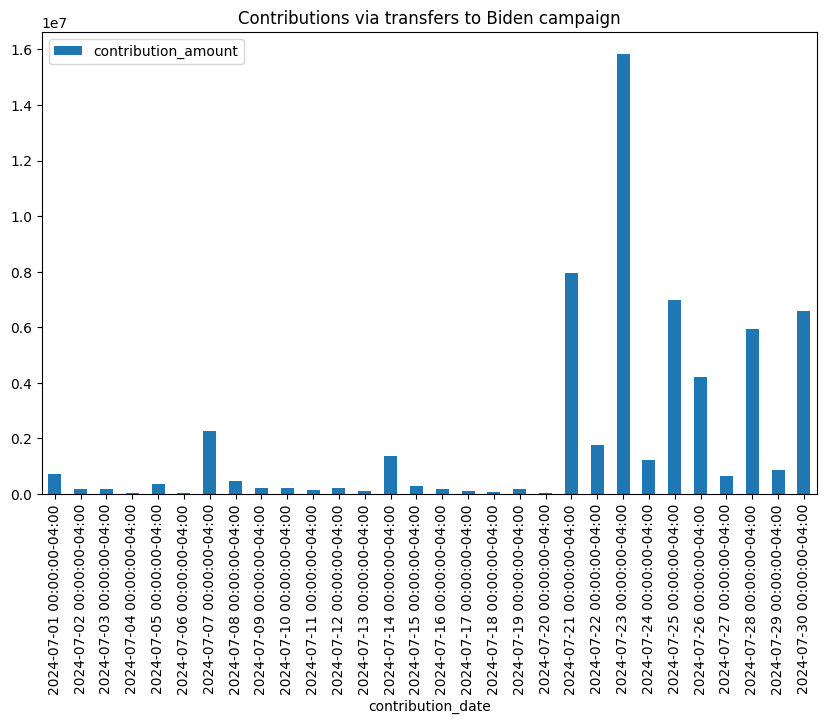

In [48]:
sa18_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title= 'Contributions via transfers to Biden campaign')

# SA17C: Contributions from other political committees

From the definition itself, you would not need this if you're just after individual contributions, but still interesting to examine.

In [49]:
sa17c= df[df.form_type=='SA17C']
sa17c= sa17c.reset_index(drop=False)
pd.set_option('display.max_columns', 50)
sa17c

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,889178,SA17C,C00703975,10094636,,,PAC,The Majority Rules,,,,,,5920 Hickman Road,Ste 400 PMB 429,Clive,IA,50325,P2024,,2024-07-12 00:00:00-04:00,2500.00,2.500000e+03,,,,C00629063,The Majority Rules,,,,,,,,,,,,,,,,,,
1,889179,SA17C,C00703975,9978031,9978031E,SA17C,COM,York County Federation Of Democratic Women,,,,,,808 Clearmount Rd,,York,PA,174034126,P2024,,2024-07-11 00:00:00-04:00,150.00,1.500000e+02,,,,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below Federally ...,
2,889180,SA17C,C00703975,9978031E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-07-14 00:00:00-04:00,150.00,1.187869e+08,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
3,889181,SA17C,C00703975,12699653,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-07-19 00:00:00-04:00,174.32,2.476420e+03,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
4,889182,SA17C,C00703975,12999367,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-07-19 00:00:00-04:00,341.80,2.476420e+03,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
5,889183,SA17C,C00703975,12788390,12788390E,SA17C,CCM,BARRAGAN FOR CONGRESS,,,,,,1840 S Gaffey St,# 421,San Pedro,CA,907315324,P2024,,2024-07-21 00:00:00-04:00,2000.00,2.000000e+03,,,,C00577353,BARRAGAN FOR CONGRESS,H6CA44103,BARRAGAN,NANETTE,,,,H,CA,44,,,,,,,,* Earmarked Contribution: See Below,
6,889184,SA17C,C00703975,12788390E,,,PAC,ActBlue,,,,,,PO Box 441146,,West Somerville,MA,021440031,P2024,,2024-07-21 00:00:00-04:00,2000.00,1.187869e+08,,,Conduit total listed in Agg. field,C00401224,ActBlue,,,,,,,,,,,,,,,,X,Note: Above Contribution earmarked through thi...,
7,889185,SA17C,C00703975,15738805,,,PAC,Sierra Club Political Committee,,,,,,2101 Webster St,Ste 1300,Oakland,CA,946123546,P2024,,2024-07-23 00:00:00-04:00,56.04,5.978000e+01,,,,C00135368,Sierra Club Political Committee,,,,,,,,,,,,,,,,,* In-Kind: Salaries & Benefits,
8,889186,SA17C,C00703975,13609667,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-07-24 00:00:00-04:00,150.00,2.626420e+03,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
9,889187,SA17C,C00703975,15655534,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-07-26 00:00:00-04:00,77.74,2.704160e+03,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,


In [50]:
sa17c.contribution_amount.sum()

7599.9

# Group SA17A and SA18

Combined, these should give you an idea of the **itemized** individual contributions. Caveat, that these are the ones just itemized. There are *smaller* donations which the FEC does not require each campaign to itemized-- depending on the report you're reading, they may be labeled as *unitemized* contributions on SA18. 

But essentially, given the limitations, you should always treat the values that come out of this analysis as **minimum** amounts and therefore should be rounded off.

In [51]:
grouped_contrib = pd.concat([sa17a_memo, sa18_IND]).reset_index(drop=True)
grouped_contrib

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00703975,9669435,9669435E,SA17A,IND,,Bloom,Judith,Gold,,,111 W 3Rd Ave,Apt 201,San Mateo,CA,944021563,P2024,,2024-06-30 00:00:00-04:00,100.0,450.00,,PJCC,Aquatics Instructor,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,,100-149
1,SA17A,C00703975,9669421,9669421E,SA17A,IND,,Channing,Alan,,,,263 W End Ave,,New York,NY,100232612,P2024,,2024-06-30 00:00:00-04:00,250.0,1650.00,,Retired,Retired,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,,200 and over
2,SA17A,C00703975,9669436,9669436E,SA17A,IND,,Glant,Lauren,,,,35 Wyckoff St,,Brooklyn,NY,112016304,P2024,,2024-06-29 00:00:00-04:00,500.0,500.00,,Self-Employed,Consulting,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,,200 and over
3,SA17A,C00703975,9669434,9669434E,SA17A,IND,,Goldman,Joe,,,,11733 Montana Ave,,Los Angeles,CA,900494792,G2024,,2024-07-01 00:00:00-04:00,18.0,3795.54,,HIAS,Community Engagement Director,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,,1-24
4,SA17A,C00703975,9669433,9669433E,SA17A,IND,,Kuriansky,Joan,,,,1870 Wyoming Ave NW,,Washington,DC,200091802,P2024,,2024-07-01 00:00:00-04:00,500.0,500.00,,Retired,Retired,,,,,,,,,,,,,,,,,,,* Earmarked Contribution: See Below,,200 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804844,SA18,C00703975,15802647,11932744,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-06-30 00:00:00-04:00,100.0,2292.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Harris Victory Fund,,100-149
804845,SA18,C00703975,15980168,11932744,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-07-07 00:00:00-04:00,100.0,2292.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Harris Victory Fund,,100-149
804846,SA18,C00703975,16316173,11932744,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-07-21 00:00:00-04:00,100.0,2292.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Harris Victory Fund,,100-149
804847,SA18,C00703975,16357578,11932744,SA18,IND,,Zysk,Dennis,,,,318 N Connecticut Ave,,Royal Oak,MI,480672034,P2024,,2024-07-21 00:00:00-04:00,25.0,2292.00,,Not Employed,Not Employed,,,,,,,,,,,,,,,,,,X,* Harris Victory Fund,,25-49


## Sum of SA17A and SA18 daily

In [52]:
grouped_contrib_daily = grouped_contrib.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
grouped_contrib_daily = grouped_contrib_daily.sort_values('contribution_date')
grouped_contrib_daily = grouped_contrib_daily[grouped_contrib_daily.contribution_date>='2024-07-01'].reset_index(drop=True) #only June
grouped_contrib_daily 

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,1709366.10
1,2024-07-02 00:00:00-04:00,1022809.68
2,2024-07-03 00:00:00-04:00,879568.87
3,2024-07-04 00:00:00-04:00,613184.28
4,2024-07-05 00:00:00-04:00,939524.82
5,2024-07-06 00:00:00-04:00,595536.53
6,2024-07-07 00:00:00-04:00,2616083.41
7,2024-07-08 00:00:00-04:00,957005.61
8,2024-07-09 00:00:00-04:00,648792.96
9,2024-07-10 00:00:00-04:00,603383.93


## Save the file!

The code below will save the combined itemized individual contributions filed under SA17A and SA18 received everyday by a campaign.

In [53]:
# grouped_contrib_daily.to_csv('harris_sa17a_sa18_daily_july.csv', index=False)

## Again, just categorizing them... you probably won't need this

In [54]:
categories_group= grouped_contrib.groupby(['range', 'form_type']).contribution_amount.sum().to_frame().reset_index()
categories_group

,range,form_type,contribution_amount
0,1-24,SA17A,867604.57
1,1-24,SA18,673803.86
2,100-149,SA17A,10033748.15
3,100-149,SA18,7587791.53
4,150-199,SA17A,883121.12
5,150-199,SA18,607290.64
6,200 and over,SA17A,53846083.78
7,200 and over,SA18,48419952.77
8,25-49,SA17A,2941122.69
9,25-49,SA18,2490187.06


# Individual contributions by location

This is a little extra, which we didn't find interesting at the time of our analysis: contributions coming from each state.

In [60]:
grouped_location = grouped_contrib.groupby('contributor_state').contribution_amount.sum().to_frame().reset_index()
grouped_location.sort_values('contribution_amount', ascending=False).head(10)

,contributor_state,contribution_amount
8,CA,27173322.46
40,NY,11336922.06
55,WA,7115549.63
24,MA,6913348.32
50,TX,6685588.03
13,FL,5963113.85
19,IL,4823839.92
52,VA,4675480.16
25,MD,4466485.02
44,PA,4376330.62


## Other forms:

- SA21: Amount of receipts from interest, dividends and repayment of loans
- SA 20A: Refunds

## SA21

In [41]:
sa21= df[df.form_type=='SA21']
sa21= sa21.reset_index(drop=False)
sa21

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,404382,SA21,C00703975,9676007,,,ORG,Amalgamated Bank,,,...,,,,,,,,,Interest earned,


In [42]:
sa21.contribution_amount.sum()

103715.31

## SA 20A

Refunds

In [43]:
sa20a= df[df.form_type=='SA20A']
sa20a= sa20a.reset_index(drop=False)
sa20a

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,404378,SA20A,C00703975,10175800,,,ORG,Gusto,,,...,,,,,,,,,Payroll Tax Refund,
1,404379,SA20A,C00703975,10175801,,,ORG,Gusto,,,...,,,,,,,,,Payroll Tax Refund,
2,404380,SA20A,C00703975,10175802,,,ORG,Gusto,,,...,,,,,,,,,Payroll Tax Refund,
3,404381,SA20A,C00703975,10175759,,,COM,Biden Victory Fund,,,...,,,,,,,,,Text Message Outreach,


In [44]:
sa20a.contribution_amount.sum()

562642.21